In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

Setup the 2006 dataframe

In [3]:
six = pd.read_table("NSDUH_2006_Tab.tsv",sep='\t', header = 0, index_col = 0, low_memory=False)

In [4]:
len(six)

55035

Create the 2006 Class Variable

In [5]:
six["COMB"] = (
    six["PROCODNP"]
    +six["OXYCODP2"]
    +six["HYDCODOP"]
    +six["TRAMADP"])
six["CLASS"] = 0
six.loc[(six["COMB"]>0) & (six["ANLYR"]==1),"CLASS"]=1
six.loc[(six["HERYR"]==1) | (six["OXYYR"]==1),"CLASS"]=1

Select the fields to study 2006 current co-incident drug use

In [6]:

drug_use2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR","STMYR",
            "MTHYR","SEDYR","CLASS"]

Select the fields to study 2006 Demographic effects

In [7]:
six_otherdrug = six.loc[six["CATAG3"]==4,drug_use2006]

In [8]:
six_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALYR,INHYR,TRQYR,STMYR,MTHYR,SEDYR,CLASS
QUESTID2,,,,,,,,,,,,
76775602,0,0,0,0,0,0,0,0,0,0,0,1
79748602,0,1,0,0,0,0,0,0,0,0,0,0
66270602,0,1,0,0,0,0,0,0,0,0,0,0
32480602,1,1,0,0,0,0,0,0,0,0,0,0
40722602,1,1,0,0,0,0,0,0,0,0,0,0


2021 - setup data frame, create CLASS variable, select certain fields for certain studies

In [9]:
tw1 = pd.read_table(
    "NSDUH_2021_Tab.txt",
    sep='\t', 
    header = 0, 
    index_col = 0, 
    low_memory=False)

In [10]:
len(tw1)

58034

In [11]:
tw1["CLASS"] = tw1["OPIANYYR"]

In [12]:

drug_use2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
            "METHAMYR","SEDANYYR","CLASS"]

In [13]:
tw1_otherdrug = tw1.loc[tw1["CATAG3"]==4,drug_use2021]

In [14]:
tw1_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALLUCYR,INHALYR,TRQANYYR,STMANYYR,METHAMYR,SEDANYYR,CLASS
QUESTID2,,,,,,,,,,,,
10002722,1,0,1,0,0,0,0,0,0,0,0,0
10004796,0,1,0,0,0,0,0,0,1,0,0,0
10007045,0,1,0,0,0,0,0,1,0,0,0,1
10008166,0,1,0,0,0,0,0,0,0,0,0,0
10009495,0,1,0,0,0,0,0,0,0,0,1,0


ANALYSIS OF 2006 DATA

In [15]:
six_pop_size = len(six_otherdrug)

In [16]:
six_opium_user = len(six_otherdrug[six_otherdrug["CLASS"]==1])

In [17]:
pct_drug_coinc_2006 = [
    len(six_otherdrug[(six_otherdrug["CLASS"]==1) 
        & (six_otherdrug[x]==1)])/six_opium_user 
    for x in drug_use2006[0:11]]

In [18]:
pct_druguse_overall_2006 = [
    len(six_otherdrug[(six_otherdrug[x]==1)])/six_pop_size 
    for x in drug_use2006]

Analysis of 2021 Data

In [19]:
tw1_pop_size = len(tw1_otherdrug) 

In [20]:
tw1_opium_user = len(tw1_otherdrug[tw1_otherdrug["CLASS"]==1])

In [21]:
pct_drug_coinc_2021 = [
    len(tw1_otherdrug[(tw1_otherdrug["CLASS"]==1) 
        & (tw1_otherdrug[x]==1)])/tw1_opium_user 
    for x in drug_use2021[0:11]]

In [22]:
pct_druguse_overall_2021 = [
    len(tw1_otherdrug[(tw1_otherdrug[x]==1)])/tw1_pop_size 
    for x in drug_use2021]

Visualizing change of usage rates between 2006 to 2021

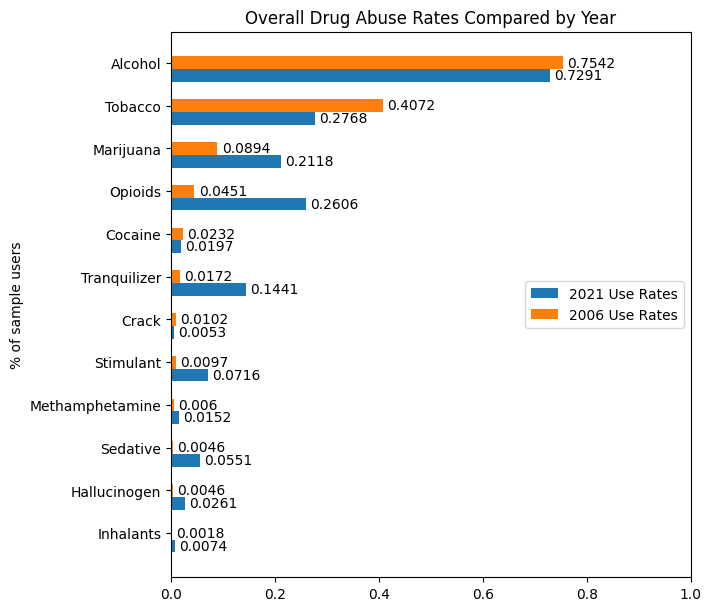

In [23]:
drug_class = ("Tobacco","Alcohol","Marijuana","Cocaine","Crack","Hallucinogen","Inhalants",
           "Tranquilizer","Stimulant","Methamphetamine","Sedative","Opioids")

drug_class_sorted = list(np.array(drug_class)[np.argsort(pct_druguse_overall_2006)])
use_rates = {
    '2021 Use Rates': list(np.around(np.array(pct_druguse_overall_2021)[np.argsort(pct_druguse_overall_2006)],4)),
    '2006 Use Rates': list(np.around(np.array(pct_druguse_overall_2006)[np.argsort(pct_druguse_overall_2006)],4)),
}

x = np.arange(len(drug_class))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in use_rates.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(7,6)
ax.set_ylabel('% of sample users')
ax.set_title('Overall Drug Abuse Rates Compared by Year')
ax.set_yticks(x + width, drug_class_sorted)
ax.legend(loc='center right')
ax.set_xlim(0, 1)
plt.show()

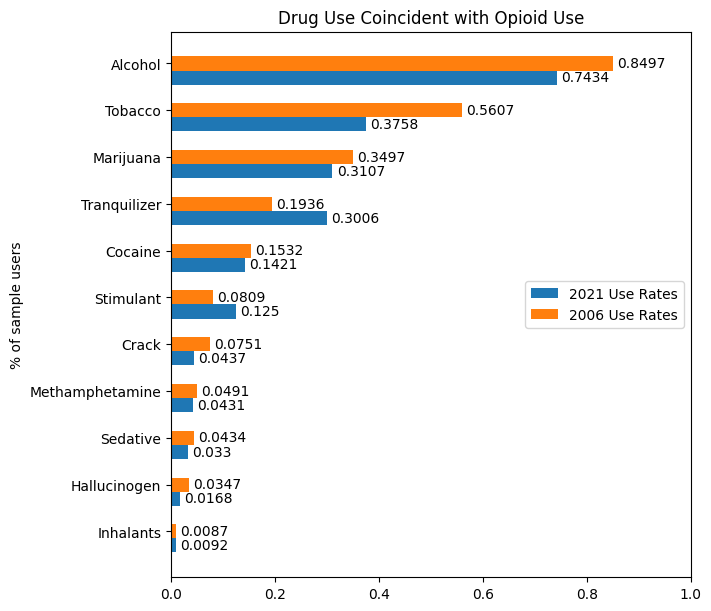

In [24]:


opioid_comp_class = ["Tobacco","Alcohol","Marijuana","Cocaine","Crack","Hallucinogen","Inhalants",
           "Tranquilizer","Stimulant","Methamphetamine","Sedative"]

opioid_comp_class_sorted = list(np.array(opioid_comp_class)[np.argsort(pct_drug_coinc_2006)])

use_rates = {
    '2021 Use Rates': list(np.around(np.array(pct_drug_coinc_2021)[np.argsort(pct_drug_coinc_2021)],4)),
    '2006 Use Rates': list(np.around(np.array(pct_drug_coinc_2006)[np.argsort(pct_drug_coinc_2006)],4)),
}

x = np.arange(len(opioid_comp_class))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in use_rates.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(7,6)
ax.set_ylabel('% of sample users')
ax.set_title('Drug Use Coincident with Opioid Use')
ax.set_yticks(x + width, opioid_comp_class_sorted)
ax.legend(loc='center right')
ax.set_xlim(0, 1)
plt.show()

In [25]:
age_use2006 = ['IRCIGAGE','IRALCAGE','IRMJAGE',
               'IRCOCAGE','IRCRKAGE','IRHALAGE',
               'IRINHAGE','IRTRNAGE','IRSTMAGE',
               'IRMTHAGE','IRSEDAGE','CLASS'
              ]
#Alcohol, Tobacco, Marijuana, Tranquilizer, 
#Cocaine, Stimulant, Crack, Methamphetamine, 
#Sedative, Hallucinogen, Inhalants

In [26]:
age_use2021 = ['IRCIGAGE','IRALCAGE','IRMJAGE',
               'IRCOCAGE','IRCRKAGE','IRHALLUCAGE',
               'IRINHALAGE','IRMETHAMAGE','IRTRQNMAGE',
               'IRSTMNMAGE','IRSEDNMAGE','CLASS'
              ]

In [27]:
six_ageuse = six.loc[six["CATAG3"]==4,age_use2006]
tw1_ageuse = tw1.loc[tw1["CATAG3"]==4,age_use2021]

In [28]:
#for x in age_use2021:
#    tw1_ageuse = tw1_ageuse[tw1_ageuse[x]<100]

#for x in age_use2006:
#    six_ageuse = six_ageuse[six_ageuse[x]<100]

#tw1_ageuse.head()

#for x in age_use2021[0:11]:
#    tw1_ageuse.loc[tw1_ageuse[x]>100,x]=-10

#for x in age_use2006[0:11]:
#    six_ageuse.loc[six_ageuse[x]>100,x]=-10

#six_ageuse.loc[six_ageuse['IRCIGAGE']>100,'IRCIGAGE']=-10
#tw1_ageuse.loc[tw1_ageuse['IRCIGAGE']>100,'IRCIGAGE']=-10

#six_ageuse.loc[six_ageuse['IRALCAGE']>100,'IRALCAGE']=-10
#tw1_ageuse.loc[tw1_ageuse['IRALCAGE']>100,'IRALCAGE']=-10



In [29]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr))*stdev

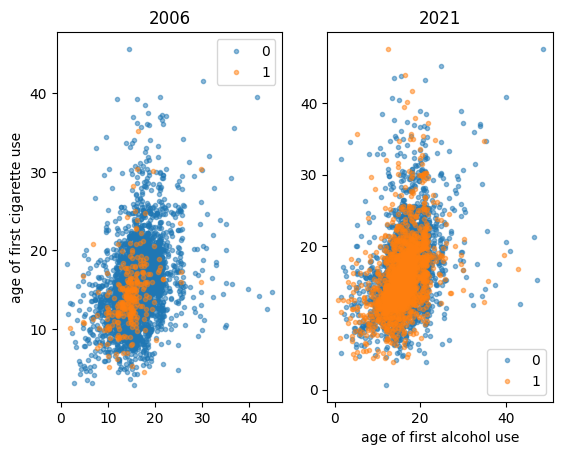

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRCIGAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRCIGAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRCIGAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.5)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRCIGAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.5)
    

ax1.set_ylabel('age of first cigarette use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

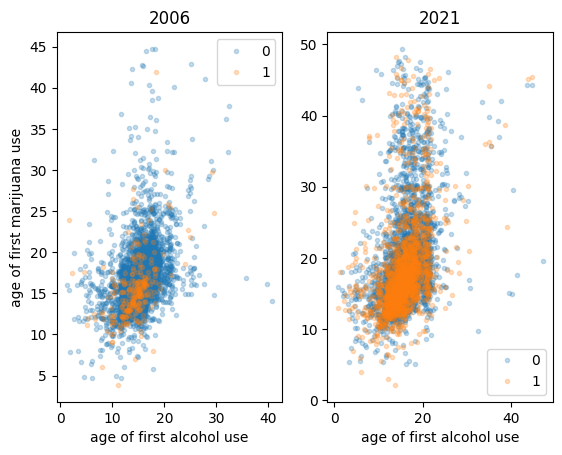

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRMJAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRMJAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRMJAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.25)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRMJAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.25)
    

ax1.set_ylabel('age of first marijuana use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

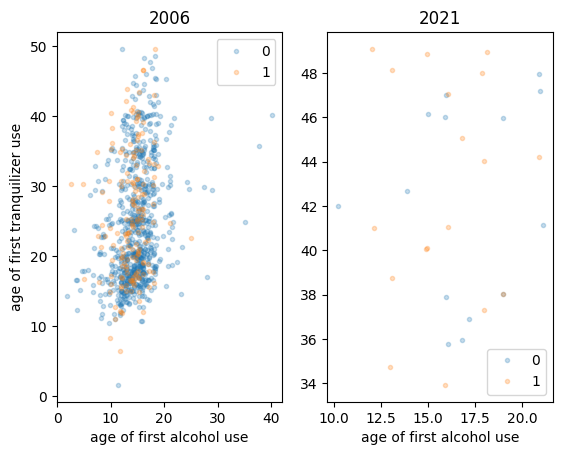

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRTRNAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRTRQNMAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRTRNAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.25)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRTRQNMAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.25)
    

ax1.set_ylabel('age of first tranquilizer use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

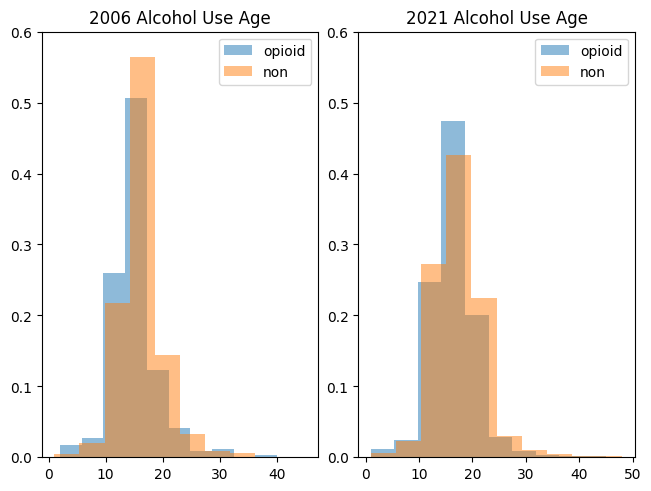

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRALCAGE']<100) & (six_ageuse['CLASS']==1),'IRALCAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRALCAGE']<100) & (six_ageuse['CLASS']==0),'IRALCAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['CLASS']==1),'IRALCAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['CLASS']==0),'IRALCAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Alcohol Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Alcohol Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

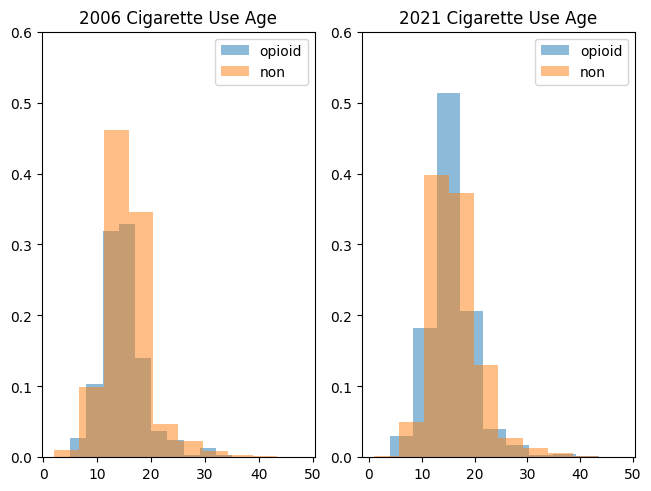

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRCIGAGE']<100) & (six_ageuse['CLASS']==1),'IRCIGAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRCIGAGE']<100) & (six_ageuse['CLASS']==0),'IRCIGAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRCIGAGE']<100) & (tw1_ageuse['CLASS']==1),'IRCIGAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRCIGAGE']<100) & (tw1_ageuse['CLASS']==0),'IRCIGAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Cigarette Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Cigarette Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

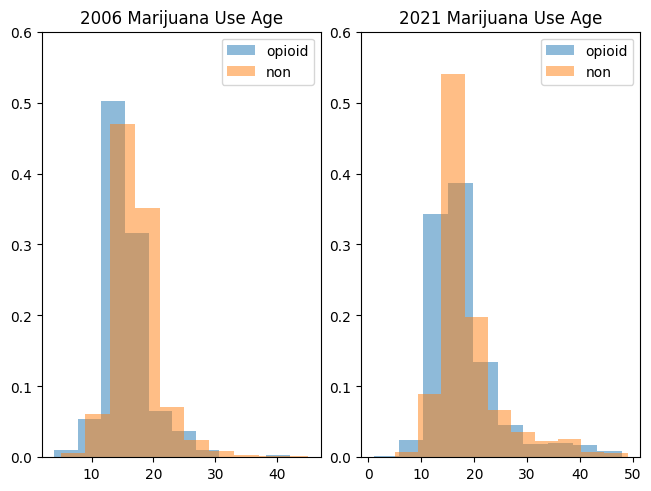

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRMJAGE']<100) & (six_ageuse['CLASS']==1),'IRMJAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRMJAGE']<100) & (six_ageuse['CLASS']==0),'IRMJAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRMJAGE']<100) & (tw1_ageuse['CLASS']==1),'IRMJAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRMJAGE']<100) & (tw1_ageuse['CLASS']==0),'IRMJAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Marijuana Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Marijuana Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

DEMOGRAPHIC DATA EXPLORATION

In [36]:
demo2006 = ['IRSEX','GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2',
            'EMPSTATY','HEALTH2','IRMARIT','AJAMDELT','AJAMDEYR',
           'SPDYRADJ','AMHINP2','CLASS']

demo2021 = ['IRSEX','GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT',
            'IRWRKSTAT','HEALTH2','IRMARIT','CASUPROB2','IRAMDELT',
            'IRAMDEYR','SPDPSTYR','AMHINP2','CLASS']

In [37]:
six_demo = six.loc[six["CATAG3"]==4,demo2006]
tw1_demo = tw1.loc[tw1["CATAG3"]==4,demo2021]

In [38]:
len(six_demo)

7665

In [39]:
len(tw1_demo)

12561

In [40]:
six_user_len = len(six_demo[six_demo["CLASS"]==1])
six_user_len

346

In [41]:
tw1_user_len = len(tw1_demo[tw1_demo["CLASS"]==1])
tw1_user_len

3273

IN-PATIENT MENTAL HEALTH TREATMENT

In [42]:
tw1_treat_count = tw1_demo.loc[(tw1_demo["CLASS"]==1),["AMHINP2"]].count()[0]
six_treat = six_demo.loc[(six_demo["CLASS"]==1),["AMHINP2"]].value_counts().sort_index()/six_user_len
tw1_treat = tw1_demo.loc[(tw1_demo["CLASS"]==1),["AMHINP2"]].value_counts().sort_index()/tw1_treat_count

In [43]:
d = {2006:[x for x in six_treat],2021:[x for x in tw1_treat]}
treat = pd.DataFrame(data=d,index=["Yes","No"])

<Axes: title={'center': 'PERCENT OPIOID USERS RECEIVING IN-PATIENT MENTAL HEALTH TREATMENT PAST YR'}>

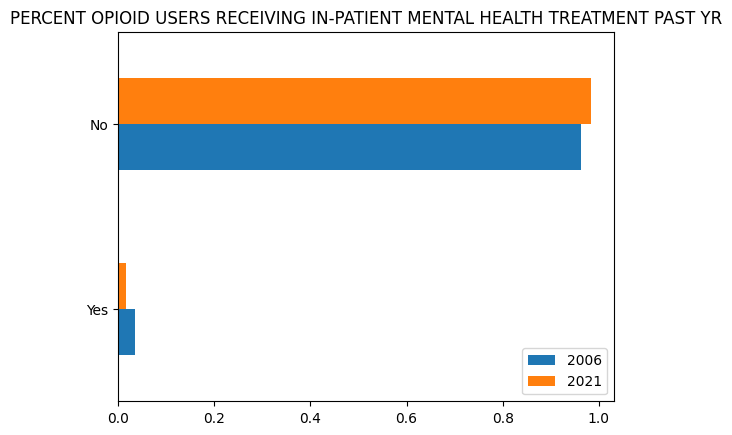

In [44]:
treat.plot.barh(title="PERCENT OPIOID USERS RECEIVING IN-PATIENT MENTAL HEALTH TREATMENT PAST YR")

SEVERE PSYCHOLOGICAL DISTRESS

In [45]:
six_psych = six_demo.loc[(six_demo["CLASS"]==1),["SPDYRADJ"]].value_counts(dropna=False).sort_index()/six_user_len
tw1_psych = tw1_demo.loc[(tw1_demo["CLASS"]==1),["SPDPSTYR"]].value_counts(dropna=False).sort_index()/tw1_user_len

In [46]:
d = {2006:[x for x in six_psych],2021:[x for x in tw1_psych]}
psych = pd.DataFrame(data=d,index=["No","Yes"])

<Axes: title={'center': 'PERCENT OPIOID USER BY SEVERE PSYCHOLOGICAL DISTRESS PAST YEAR'}>

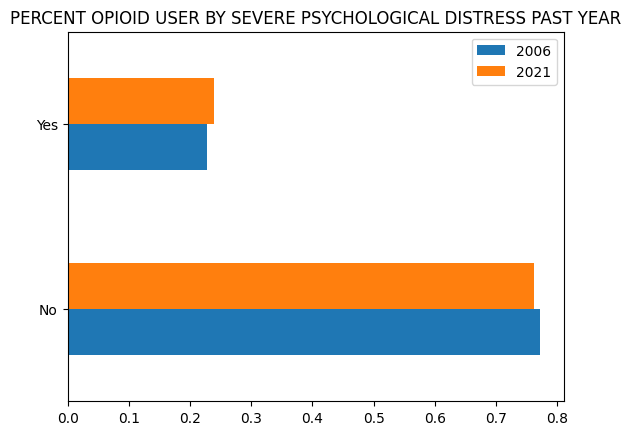

In [47]:
psych.plot.barh(title="PERCENT OPIOID USER BY SEVERE PSYCHOLOGICAL DISTRESS PAST YEAR")

MAJOR DEPRESSIVE EPISODE

In [48]:
six_depress = six_demo.loc[(six_demo["CLASS"]==1),["AJAMDEYR"]].value_counts().sort_index()/six_user_len
tw1_depress = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRAMDEYR"]].value_counts().sort_index()/tw1_user_len

In [49]:
d = {2006:[x for x in six_depress],2021:[x for x in tw1_depress]}
depress = pd.DataFrame(data=d,index=["No","Yes"])

In [50]:
depress

,2006,2021
No,0.176301,0.857012
Yes,0.812139,0.142988


<Axes: title={'center': 'PERCENT OPIOID USER BY MAJOR DEPRESSIVE EPISODE IN LAST YEAR'}>

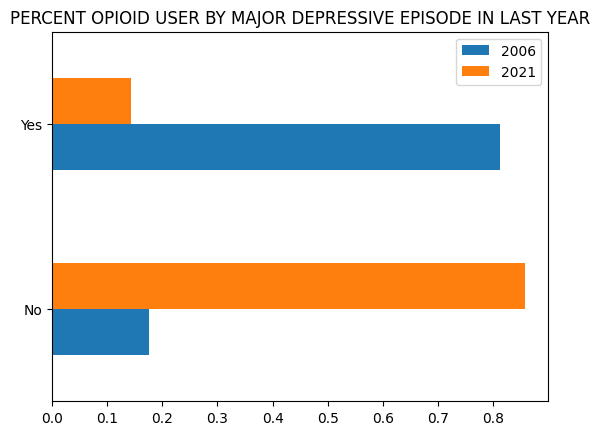

In [51]:
depress.plot.barh(title="PERCENT OPIOID USER BY MAJOR DEPRESSIVE EPISODE IN LAST YEAR")

MARITAL STATUS

In [52]:
six_married = six_demo.loc[(six_demo["CLASS"]==1),["IRMARIT"]].value_counts(dropna=False).sort_index()/six_user_len
tw1_married = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRMARIT"]].value_counts(dropna=False).sort_index()/tw1_user_len

In [53]:
d = {2006:[x for x in six_married],2021:[x for x in tw1_married]}
married = pd.DataFrame(data=d,index=["Married","Widowed","Divorced/Separated","Never Married"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY MARITAL STATUS'}>

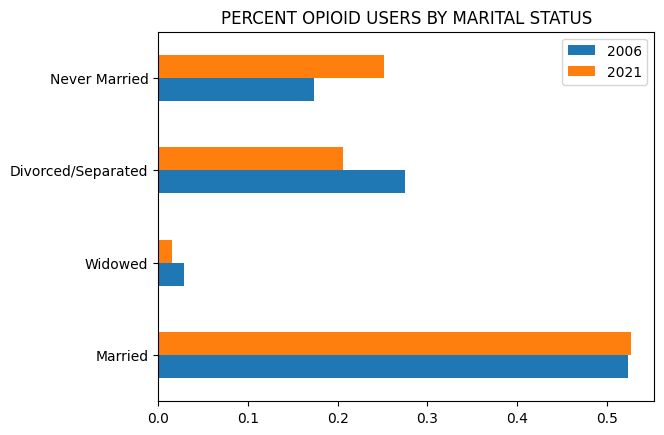

In [54]:
married.plot.barh(title="PERCENT OPIOID USERS BY MARITAL STATUS")

OVERALL HEALTH CONDITION

In [55]:
six_health = six_demo.loc[(six_demo["CLASS"]==1),["HEALTH2"]].value_counts().sort_index()/six_user_len
tw1_health = tw1_demo.loc[(tw1_demo["CLASS"]==1),["HEALTH2"]].value_counts().sort_index()/tw1_user_len

In [56]:
d = {2006:[x for x in six_health],2021:[x for x in tw1_health]}
health = pd.DataFrame(data=d,index=["Excellent","Very Good","Good","Fair/Poor"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY SELF-REPORTED HEALTH LEVEL'}>

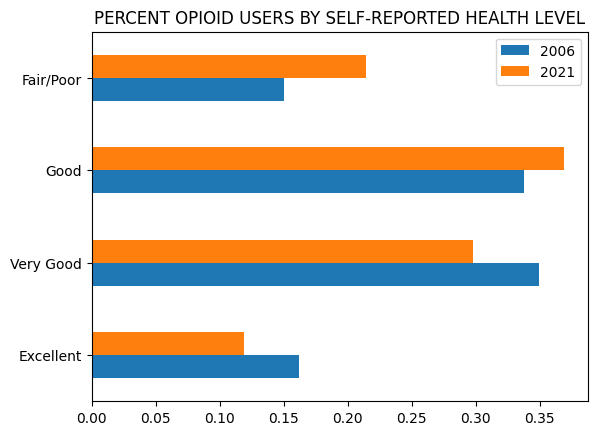

In [57]:
health.plot.barh(title="PERCENT OPIOID USERS BY SELF-REPORTED HEALTH LEVEL")

EMPLOYMENT

In [58]:
six_employment = six_demo.loc[(six_demo["CLASS"]==1),["EMPSTATY"]].value_counts().sort_index()/six_user_len
tw1_employment = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRWRKSTAT"]].value_counts().sort_index()/tw1_user_len

In [59]:
d = {2006:[x for x in six_employment],2021:[x for x in tw1_employment]}
employment = pd.DataFrame(data=d,index=["FULL TIME","PART TIME","UNEMPLOYED","OTHER"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY EMPLOYMENT STATUS'}>

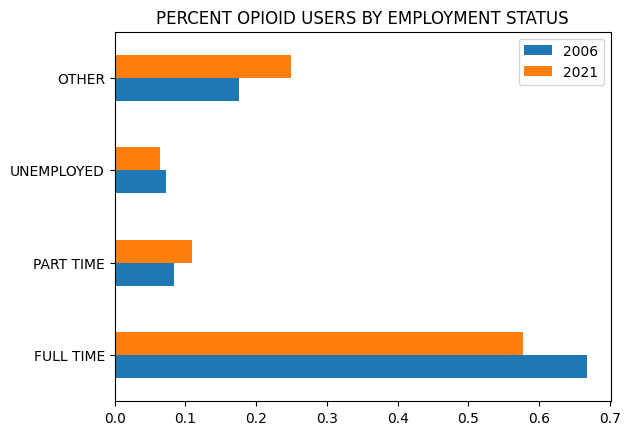

In [60]:
employment.plot.barh(title="PERCENT OPIOID USERS BY EMPLOYMENT STATUS")

EDUCATION

In [61]:
six_educate = six_demo.loc[(six_demo["CLASS"]==1),["EDUCCAT2"]].value_counts().sort_index()/six_user_len
tw1_educate = tw1_demo.loc[(tw1_demo["CLASS"]==1),["EDUHIGHCAT"]].value_counts().sort_index()/tw1_user_len

In [62]:
d = {2006:[x for x in six_educate],2021:[x for x in tw1_educate]}
educate = pd.DataFrame(data=d,index=["SOME HS","HS GRAD","SOME COLLEGE","COLLEGE GRAD"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY EDUCATION LEVEL'}>

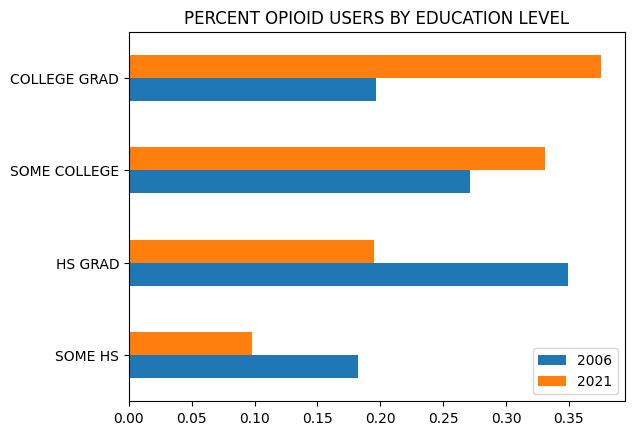

In [63]:
educate.plot.barh(title="PERCENT OPIOID USERS BY EDUCATION LEVEL")

GENDER AND RACE

In [64]:
six_sexrace = six_demo.loc[(six_demo["CLASS"]==1),["SEXRACE"]].value_counts().sort_index()/six_user_len
tw1_sexrace = tw1_demo.loc[(tw1_demo["CLASS"]==1),["SEXRACE"]].value_counts().sort_index()/tw1_user_len

In [65]:
d = {2006:[x for x in six_sexrace],2021:[x for x in tw1_sexrace]}
sexrace = pd.DataFrame(data=d,index=["White Male",
                                     "White Female",
                                     "Black Male",
                                     "Black Female",
                                     "Hispanic Male",
                                     "Hispanic Female",
                                     "Other"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY RACE/GENDER'}>

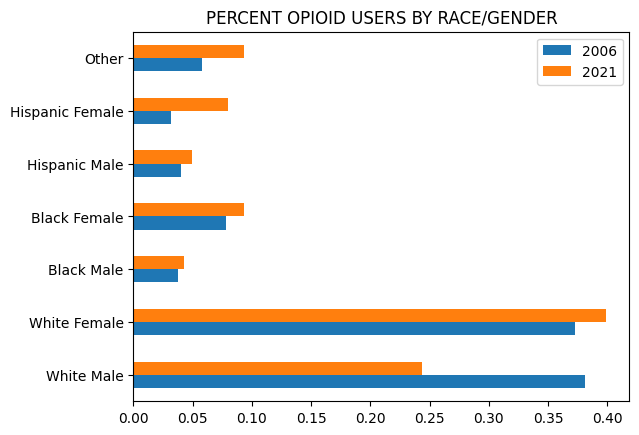

In [66]:
sexrace.plot.barh(title="PERCENT OPIOID USERS BY RACE/GENDER")

POVERTY

In [67]:
six_poverty = six_demo.loc[(six_demo["CLASS"]==1),["POVERTY2"]].value_counts().sort_index()/six_user_len
tw1_poverty = tw1_demo.loc[(tw1_demo["CLASS"]==1),["POVERTY3"]].value_counts().sort_index()/tw1_user_len

In [68]:
d = {2006:[x for x in six_poverty],2021:[x for x in tw1_poverty]}
poverty = pd.DataFrame(data=d,index=["Poverty","2xPoverty",">2xPoverty"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY POVERTY LEVEL'}>

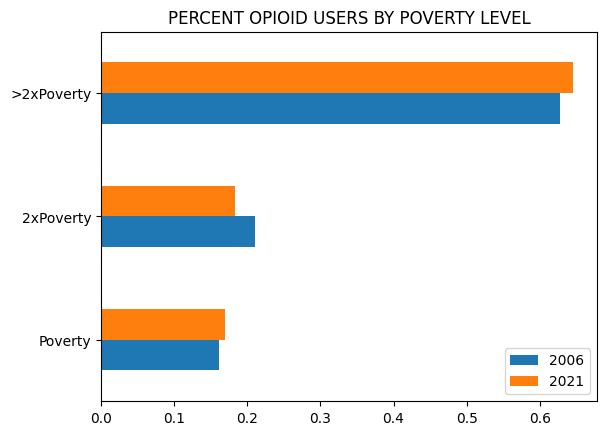

In [69]:
poverty.plot.barh(title="PERCENT OPIOID USERS BY POVERTY LEVEL")

GENDER

In [70]:
six_gender = six_demo.loc[(six_demo["CLASS"]==1),["IRSEX"]].value_counts().sort_index()/six_user_len
tw1_gender = tw1_demo.loc[(tw1_demo["CLASS"]==1),["IRSEX"]].value_counts().sort_index()/tw1_user_len

In [71]:
d = {2006:[x for x in six_gender],2021:[x for x in tw1_gender]}
gender = pd.DataFrame(data=d,index=["Male","Female"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY GENDER'}>

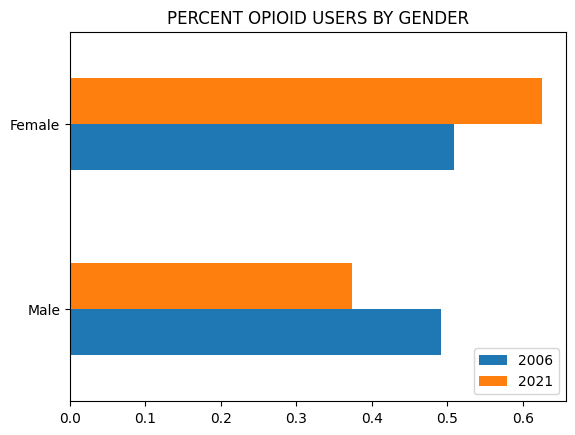

In [72]:
gender.plot.barh(title="PERCENT OPIOID USERS BY GENDER")

RECEIVE GOVERNMENT ASSISTANCE

In [73]:
six_govtprog = six_demo.loc[(six_demo["CLASS"]==1),["GOVTPROG"]].value_counts().sort_index()/six_user_len
tw1_govtprog = tw1_demo.loc[(tw1_demo["CLASS"]==1),["GOVTPROG"]].value_counts().sort_index()/tw1_user_len

In [74]:
d = {2006:[x for x in six_govtprog],2021:[x for x in tw1_govtprog]}
income = pd.DataFrame(data=d,index=["receive","do not receive"])

<Axes: title={'center': 'PERCENT OPIOID USERS BY RECEIPT OF GOVT ASSISTANCE'}>

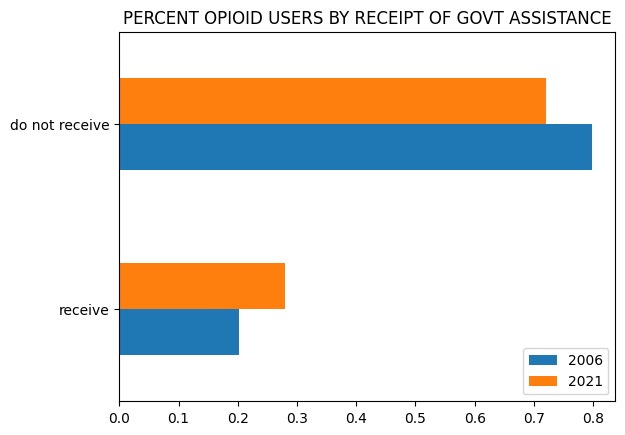

In [75]:
income.plot.barh(title="PERCENT OPIOID USERS BY RECEIPT OF GOVT ASSISTANCE")

INCOME

In [76]:
six_income = six_demo.loc[(six_demo["CLASS"]==1),["INCOME"]].value_counts().sort_index()/six_user_len

In [77]:
tw1_income = tw1_demo.loc[(tw1_demo["CLASS"]==1),["INCOME"]].value_counts().sort_index()/tw1_user_len

In [78]:
d = {2006:[x for x in six_income],2021:[x for x in tw1_income]}
income = pd.DataFrame(data=d,index=["<20K","20K-49K","50K-75K",">75K"])

<Axes: title={'center': 'PERCENT OF OPIOID USERS BY INCOME BRACKET'}>

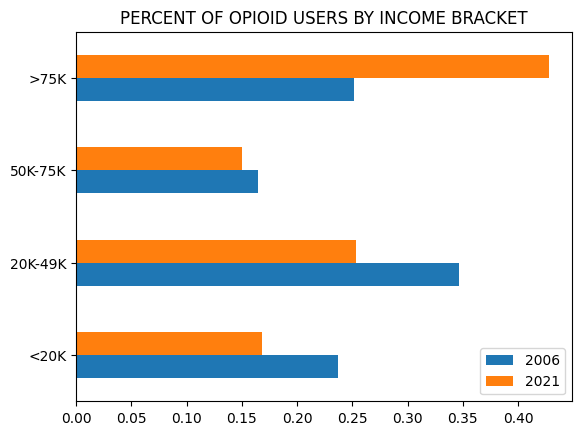

In [79]:
income.plot.barh(title='PERCENT OF OPIOID USERS BY INCOME BRACKET')

CORRELATION HEAT MAP

In [80]:
np.set_printoptions(precision=2,suppress=True)

In [81]:
demo2006 = ['IRSEX','GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2',
            'EMPSTATY','HEALTH2','IRMARIT','AJAMDELT','AJAMDEYR',
           'SPDYRADJ','AMHINP2','CLASS']

drug_use2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR","STMYR",
            "MTHYR","SEDYR","CLASS"]

demo2021 = ['IRSEX','GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT',
            'IRWRKSTAT','HEALTH2','IRMARIT','CASUPROB2','IRAMDELT',
            'IRAMDEYR','SPDPSTYR','AMHINP2','CLASS']

drug_use2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
            "METHAMYR","SEDANYYR","CLASS"]

In [82]:
regnames = ['welfare','income','poverty','gender-race','education level','employment',
            'health','marital status','major depression ep','severe psych distress','mental health hospitalization',
            'tobacco','alcohol','marijuana','cocaine','crack','hallucinogens','inhalants','tranquilizer',
            'stimulant','methamphetamines','sedatives']
            
corrlist_2006 = ['GOVTPROG','INCOME','POVERTY2','SEXRACE',
                 'EDUCCAT2','EMPSTATY','HEALTH2','IRMARIT','AJAMDEYR',
                 'SPDYRADJ','AMHINP2',"TOBYR","ALCYR","MRJYR","COCYR","CRKYR",
                 "HALYR","INHYR","TRQYR","STMYR",
                 "MTHYR","SEDYR"]

corrlist_2021 = ['GOVTPROG','INCOME','POVERTY3','SEXRACE',
                 'EDUHIGHCAT','IRWRKSTAT','HEALTH2','IRMARIT','IRAMDEYR',
                 'SPDPSTYR','AMHINP2',"TOBYR","ALCYR","MRJYR","COCYR","CRKYR",
                 "HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
                 "METHAMYR","SEDANYYR"]

corrdf_2006 = six.loc[six["CATAG3"]==4,corrlist_2006]
corrdf_2021 = tw1.loc[tw1["CATAG3"]==4,corrlist_2021]

In [83]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
        https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%c3%a9rs-coefficient-matrix
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [99]:
def corrmat(dataframe):
    colname = dataframe.columns.values.tolist()
    cols = len(colname)
    mat = np.empty([cols,cols])
    for x in range(cols):
        for y in range(x+1,cols):
            confusion_matrix = pd.crosstab(dataframe[colname[x]],dataframe[colname[y]]).to_numpy()
            corrval = round(cramers_corrected_stat(confusion_matrix),2)
            #print(corrval)
            mat[x,y]=round(corrval,2)
    return np.triu(mat,k=1)
            

In [100]:
def heatmap(data,year):
    fig, ax = plt.subplots()
    im = ax.imshow(data)
    
    fig.set_size_inches(10,10)
    
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(regnames)), labels=regnames)
    ax.set_yticks(np.arange(len(regnames)), labels=regnames)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(regnames)):
        for j in range(len(regnames)):
            text = ax.text(j, i, data[i, j],
                           ha="center", va="center", color="w", fontsize='xx-small')
    
    ax.set_title(f"Correlation Heatmap of Selected Fields from {year} NSDUH Survey")
    #fig.tight_layout()
    plt.show()

In [101]:
data2006 = corrmat(corrdf_2006)
data2021 = corrmat(corrdf_2021)

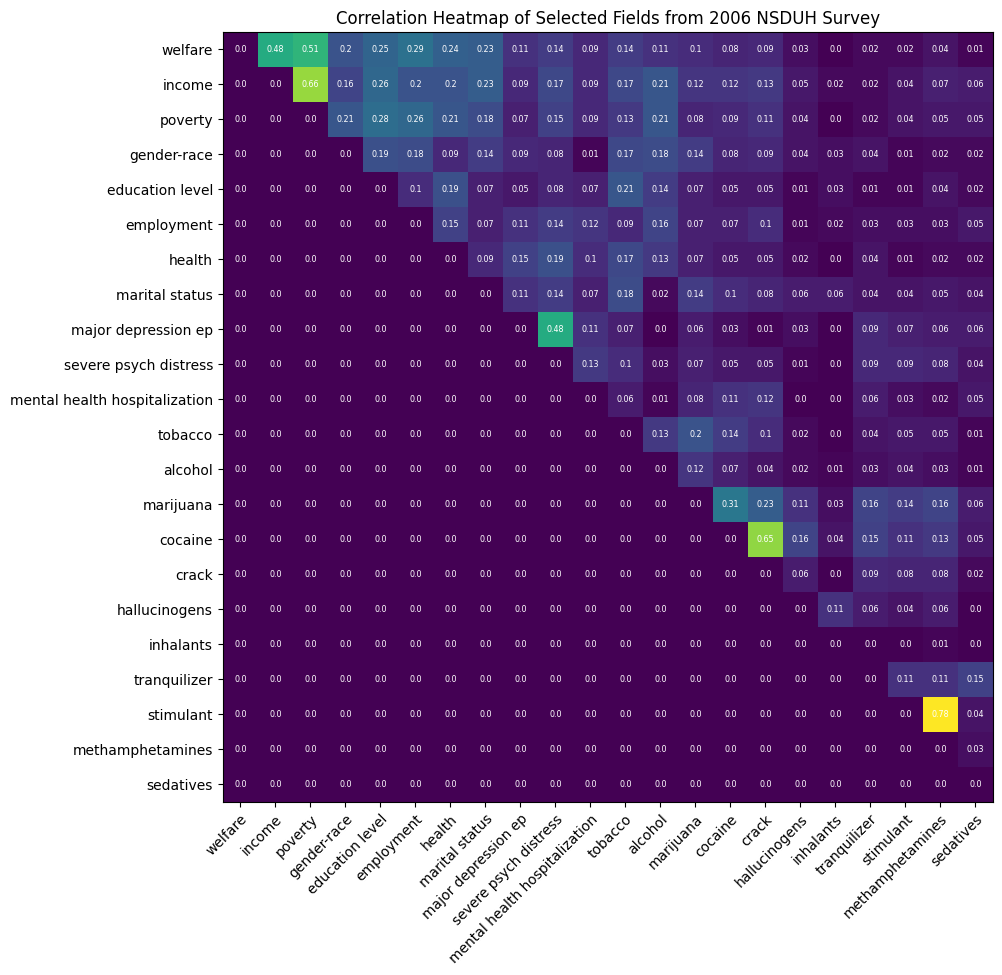

In [102]:
heatmap(data2006,2006)

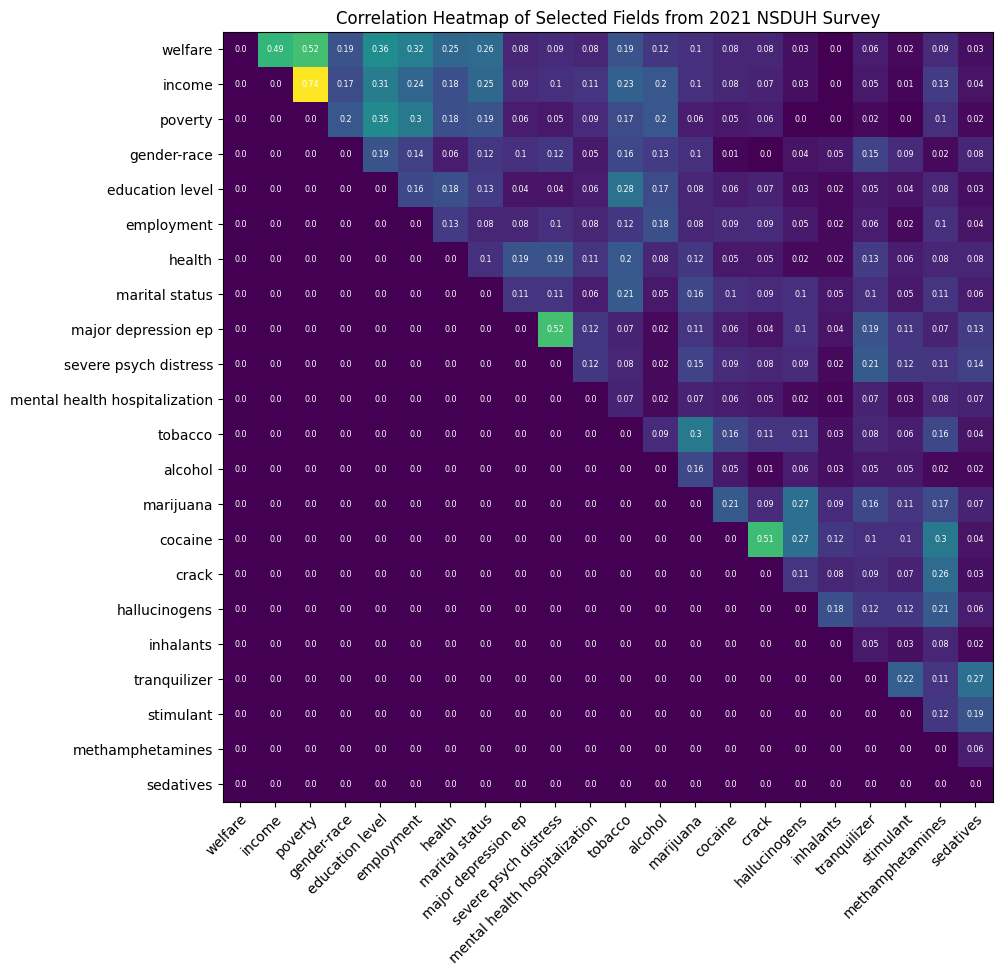

In [103]:
heatmap(data2021,2021)